# Causal Graphs and Omitted Variables

The issue of causality creates a large, but not necessarily insurmountable, gap between theoretical and empirical work.

## Structural Models

Consider a set of variables $\{Y,X\}$ for $Y$ a vector of length $N$ and $X$ a matrix with dimension $N \times K$.  Let the vector $U$ denote random, unobservable noise with mean zero.  The unit of observation is indexed by $i$.  A **structural model** specifies a function $g()$ such that
\begin{equation}
  g(Y,X,U|\theta)=0. \label{structural}
\end{equation}

If there is a unique solution for $Y$ given $\{X,U\}$, we can write
\begin{equation}
  Y = h(X,U|\beta) \label{reduced}
\end{equation}
where $h()$ is referred to as the **reduced form** of $g()$.  The reduced form parameters, $\beta$, are functions of $\theta$.

A theoretical model will yield either $\eqref{structural}$ or $\eqref{reduced}$.  If the random, unobservable noise $U$ is additively separable from $X$ under $h()$ then we can write the reduced form equation as
\begin{equation}
  Y = f(X|\beta) + U. \label{reduced2}
\end{equation}
When $X$ and $U$ are uncorrelated, $\beta$ can be estimated econometrically.  When $X$ and $U$ are correlated, $X$ is **endogenous** with $U$ and parameters $\beta$ cannot necessarily be consistently estimated.  Linear regression, for instance, will always fail to produce consistent estimates.  Later sections of this chapter will discuss special cases in which a consistent estimate for $\beta$ can be achieved despite the correlation between $X$ and $U$.

Many theory models describe an error process such that the reduced form can be written as in $\eqref{reduced2}$.  The simplest form of $f()$ is a linear function such that the reduced form can be written as
\begin{equation}
  Y = X \beta + U. \label{ols}
\end{equation}

A model is **identified** if there is a unique parameter vector $\theta$ that satisfies equation $\eqref{structural}$.  Some empiricists have co-opted the word "identification" to mean something about causality, a problem pointed out by [Kahn and Whited](https://academic.oup.com/rcfs/article/7/1/1/4590088).  As an example of an identification problem, suppose that the structural model $\eqref{structural}$ has the reduced form given in $\eqref{ols}$.  If $X$ is not of full rank, an infinite number of $\beta$ vectors can be specified to satisfy the reduced form equation.  Instead, if $X$ has full rank, the vector $\beta$ is identified (has a unique value).

Any model has a graphical representation.  See [Pearl (2009)](http://bayes.cs.ucla.edu/BOOK-2K/) for a treatise on causal graphical modeling.

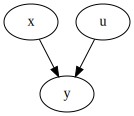

In [25]:
from causalgraphicalmodels import CausalGraphicalModel
ols = CausalGraphicalModel(
    nodes=["x", "y", "u"],
    edges=[
        ("x", "y"), 
        ("u", "y")
    ]
)
ols.draw() # str(graphviz.Source(ols.draw().source)) yields the raw graph data

### Simultaneity

Suppose that a model "exogenizes" (assumes as given) covariate $X^{(j)}$ (the $j^{th}$ column of $X$) when, in reality, $X^{(j)}$ and $Y$ are jointly determined.  Under a linear reduced form with separable errors, joint determination implies a set of simultaneous equations such as
\begin{equation}
  Y = X^{(j)} \beta^{(j)} + X^{(-j)} \beta^{(-j)} + U \label{sem1}
\end{equation}
and
\begin{equation}
  X^{(j)} = Y \phi + X^{(-j)} \varphi + U' \label{sem2}
\end{equation}
where ${(-j)}$ indicates removal of column/element $j$ and $U'$ is random, mean zero noise that is independent of $U$.  Insert $\eqref{sem1}$ into $\eqref{sem2}$ and to solve for $X^{(j)}$:
\begin{equation}
  X^{(j)} = X^{(-j)} \frac{\varphi + \phi\beta^{(-j)}}{1-\beta^{(j)}\phi} + V \frac{1}{1-\beta^{(j)}\phi} + \frac{\phi}{1-\beta^{(j)}\phi} + U. \label{sem3}
\end{equation}
Inserting $\eqref{sem3}$ back in to $\eqref{sem1}$ reveals a problem: $\beta^{(j)}$ cannot be consistently estimated because $X^{(j)}$ is correlated with $U$.

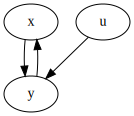

In [2]:
import graphviz
simultaneity = graphviz.Digraph('G')
simultaneity.edge('x','y')
simultaneity.edge('u','y')
simultaneity.edge('y','x')
simultaneity

### Reverse Causality

Consider a theoretical model that implies a reduced form equation as in $\eqref{ols}$.  If that equation has no issues with endogeneity (see below), parameters $\beta$ will have a causal intepretation.  However, an empiricist who foolishly estimates the model
\begin{equation}
  X^{(j)} = Y\phi + X^{(-j)}\varphi + V
\end{equation}
will produce parameter estimates that are econometrically consistent but not economically causal.  This is a reverse causality problem.  If $\beta^{(j)}$ is the causal effect of $X^{(j)}$ on $Y$ then $\phi$ cannot be the causal effect of $Y$ on $X^{(j)}$.

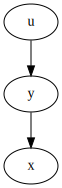

In [3]:
reverse = graphviz.Digraph('G')
reverse.edge('y','x')
reverse.edge('u','y')
reverse

## Endogeneity

A theorist carefully specifies a set of assumptions about the world, such as the utility function of an agent in a principal-agent problem.  Under these assumptions, a maximization problem is solved given a set of constraints.  As stated above, the theory model will specify an equation that looks something like $\eqref{structural}$ or $\eqref{reduced}$.  On occasion, that theory will yield a reduced form that simplifies to $\eqref{ols}$.  The equation in $\eqref{ols}$ is special because it describes a linear relationship between $Y$ and $X$ that can be estimated by Ordinary Least Squares (OLS) regression.

However, even if a theory posits a reduced form that looks like $Y = X\beta + U$, this *does not* give the empiricist carte blanche to run a linear regression on data $\{Y, X\}$ and interpret $\beta$ in a *causal* manner.  That is, an empiricist cannot run OLS and interpret $\beta^{(j)} = \partial Y / \partial X^{(j)}$ as indicating that a one unit increase in covariate $j$ *causes* a $\beta^{(j)}$ increase in $Y$.  Why?  The reduced form equation is only correct if the theory is correct.  Theories are rigorous approximations of reality, but they are only approximations.  Any theoretical paper will impose assumptions that may not hold in practice (note that some of the assumptions may be implicit).  Often, real-world data $X$ is not additively separable from $U$ because the theory excludes certain elements of reality.  This critique *does not* imply that theories are not useful.  A good theory model can reveal incredibly powerful insights about the real world.

### Omitted Variable Bias

An empiricist uses data $\{Y,X\}$ observed in the real world.  Theoretical assumptions may rule out certain features of reality.  Denote these "omitted features" as data $Z$.  The real-world data generating process for $Y$ may be
\begin{equation}
  Y = X \beta + Z \gamma + U \label{truedgp}
\end{equation}
which can be written as
\begin{equation}
  Y = X \beta + V. \label{endog}
\end{equation}
An empiricist might regress $Y$ on $X$ following a theoretical description of a relationship that looks like $\eqref{ols}$.  However, if the actual relationship is given by $\eqref{endog}$, the estimated $\beta$ parameters will be incorrect if $X$ and $Z$ are correlated because this implies that $X$ and $V$ are correlated.

Often, an empiricist is concerned about omitted variable bias for a specific right hand side variable.  Suppose that we partition $X$ from $\eqref{endog}$ into components $\{D,W\}$ where $D$ is a vector of data for a variable of interest and $W$ is a matrix containing the remaining columns of $X$.  Assuming the data generating process in $\eqref{truedgp}$, the desired regression is
\begin{equation}
  Y = \tau D + W \pi + Z \gamma + U \label{ovb1}
\end{equation}
and the regression available to the empiricist is
\begin{equation}
  Y = \tau D + W \pi + V. \label{ovb2}
\end{equation}

Graphically, $Z$ shares a correlation with $D$ and also has a causal effect on $Y$.  Either $D$ and $Z$ cause each other or share an unobserved confounder $E$.

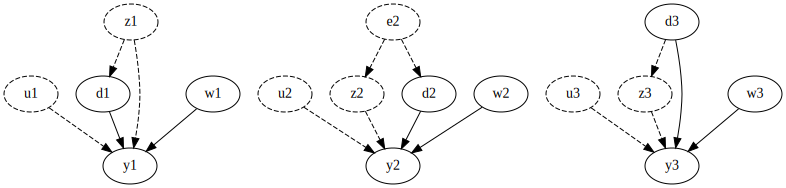

In [4]:
ovb = graphviz.Digraph('G')
with ovb.subgraph(name='case 1') as a:
    a.node('u1', _attributes={'style': 'dashed'})
    a.node('z1', _attributes={'style': 'dashed'})
    a.edge('d1', 'y1')
    a.edge('w1', 'y1')
    a.edge('u1', 'y1', _attributes={'style': 'dashed'})
    a.edge('z1', 'd1', _attributes={'style': 'dashed'})
    a.edge('z1', 'y1', _attributes={'style': 'dashed'})
with ovb.subgraph(name='case 2') as b:
    b.node('z2', _attributes={'style': 'dashed'})
    b.node('u2', _attributes={'style': 'dashed'})
    b.node('e2', _attributes={'style': 'dashed'})
    b.edge('d2', 'y2')
    b.edge('w2', 'y2')
    b.edge('u2', 'y2', _attributes={'style': 'dashed'})
    b.edge('e2', 'z2', _attributes={'style': 'dashed'})
    b.edge('e2', 'd2', _attributes={'style': 'dashed'})
    b.edge('z2', 'y2', _attributes={'style': 'dashed'})
with ovb.subgraph(name='case 3') as c:
    c.node('z3', _attributes={'style': 'dashed'})
    c.node('u3', _attributes={'style': 'dashed'})
    c.edge('d3', 'y3')
    c.edge('w3', 'y3')
    c.edge('u3', 'y3', _attributes={'style': 'dashed'})
    c.edge('d3', 'z3', _attributes={'style': 'dashed'})
    c.edge('z3', 'y3', _attributes={'style': 'dashed'})
ovb

In the first scenario, there is a backdoor path from $D$ to $Y$.  The path is $D \leftarrow Z \rightarrow Y$.  Likewise in scenario two, there is a backdoor path $D \leftarrow E \rightarrow Z \rightarrow Y$.  Under these circumstances, it is impossible to estimate the causal effect of $D$ on $Y$ without observing $Z$.

In [5]:
ovb1 = CausalGraphicalModel(
    nodes=["d", "y", "w", "u", "z"],
    edges=[
        ('u','y'),
        ('z','y'),
        ('z','d'),
        ('d','y'),
        ('w','y')
    ]
)
ovb2 = CausalGraphicalModel(
    nodes=["d", "y", "w", "u", "z", "e"],
    edges=[
        ('e','z'),
        ('e','d'),
        ('u','y'),
        ('z','y'),
        ('d','y'),
        ('w','y')
    ]
)
ovb3 = CausalGraphicalModel(
    nodes=["d", "y", "w", "u", "z"],
    edges=[
        ('d','z'),
        ('d','y'),
        ('z','y'),
        ('u','y'),
        ('w','y')
    ]
)
print(ovb1.get_all_backdoor_paths("d", "y"))
print(ovb2.get_all_backdoor_paths("d", "y"))
print(ovb3.get_all_backdoor_paths("d", "y"))

[['d', 'z', 'y']]
[['d', 'e', 'z', 'y']]
[]


In the third scenario, there is no backdoor path.  We can estimate the causal *total* effect of $X$ on $Y$.  However, without observing the path $X \rightarrow Z \rightarrow Y$ we cannot estimate the moderating effect of $Z$.  This scenario satisfies the "classic" endogeneity critique in economics: (1) $Z$ is unobserved, (2) $Z$ affects $Y$, (3) $Z$ is correlated with $X$.  Yet, omission of $Z$ as a regressor *does not* imply that the $\beta$ coefficient estimated in $\eqref{ovb2}$ is biased.

The problem with the third scenario is that there is a threat to the **external validity** of the estimated $\beta$.  The $\beta$ estimated from model $\eqref{ovb2}$ yields the average total effect of $X$ conditional on an unobserved $Z$.  Suppose $\beta > 0$ and that $Z$ has a dampening effect on $X$, meaning that $\gamma < 0$ in the true model $\eqref{ovb1}$.  If our estimation sample happens to have data points with low values of $Z$, an estimation $\beta$ coefficient from model $\eqref{ovb2}$ will estimate the total effect of $X$ under very limited moderation.  Thus, the $\beta$ estimate will be close to the true $\beta$ in $\eqref{ovb1}$.  However, we could not safely extrapolate our measured effect of $X$ on $Y$ to data in which $Z$ is, on average, larger in absolute magnitude than it is in the estimation sample.  Our extrapolation would overstate predictions for $Y$ because we would not have correctly measued the moderating power of $Z$.

An interesting application of this third form of omitted variable bias is in the context of spillover effects, as shown below.  Suppose that firms 1 and 2 are each potentially exposed to a treatment.  The firm-level treatment status is captured in $x$.  The group-level treatment, $z$, is dependent upon the treatment statuses of each firm.  If there are spillover effects of treatment (to either treated or to untreated units), a path from $x$ to $y$ via $z$ exists.  Empirical analysis that ignores $z$ will estimate the *total* causal effect of $x$ on $y$ subject to the average level of spillovers within the sample (Hudgens & Halloran 2008).  Under such a model, the causal estimate would have limited external validity because it would only be applicable to contexts with an equal group level of treatment.

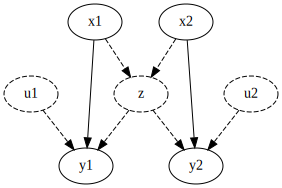

In [6]:
spillovers = graphviz.Digraph('G')
spillovers.node('z', _attributes={'style': 'dashed'})
with spillovers.subgraph(name='firm 1') as a:
    a.edge('u1', 'y1', _attributes={'style': 'dashed'})
    a.edge('x1', 'y1')
with spillovers.subgraph(name='firm 2') as b:
    b.edge('x2', 'y2')
    b.edge('u2', 'y2', _attributes={'style': 'dashed'})
spillovers.edge('x1', 'z', _attributes={'style': 'dashed'})
spillovers.edge('z', 'y1', _attributes={'style': 'dashed'})
spillovers.edge('x2', 'z', _attributes={'style': 'dashed'})
spillovers.edge('z', 'y2', _attributes={'style': 'dashed'})
spillovers.node('u1', _attributes={'style': 'dashed'})
spillovers.node('u2', _attributes={'style': 'dashed'})
spillovers

**One Omitted Variable (extremely unlikely)**

For the moment, assume that $Z$ is a vector.  Let $\hat{\tau}_{\text{res}}$ be the estimate of $\tau$ from $\eqref{ovb2}$, $\hat{\tau}$ be the (hypothetical) estimate of $\tau$ from $\eqref{ovb1}$, $\hat{\gamma}$ be the (hypothetical) estimate of $\gamma$ from $\eqref{ovb1}$, and $\hat{\delta}$ be the estimated coefficient in the (hypothetical) regression
\begin{equation}
  Z = \varphi D + W \phi + E \label{ovb_aux}
\end{equation}
where $E$ is random, mean zero noise.  The omitted variable bias formula for $\tau$ is given by
\begin{equation}
  \hat{\tau}_{\text{res}} = \hat{\tau} + \hat{\gamma}\hat{\varphi}. \label{ovb}
\end{equation}
To assess the severity of omitted variable bias on the estimate $\hat{\tau}_{\text{res}}$, one could apply economic arguments about expected magnitudes of $\hat{\gamma}$ and $\hat{\varphi}$.  This approach is limited for a number of reasons.  One obvious issue is that $Z$ is assumed to be a single omitted factor; realistically, any empirical model will omit many unobservable features.  Another important limitation of the utility of $\eqref{ovb}$ is that parameter estimates scale inversely with the scale of the data.  For instance, if one multiplies $D$ by $10$ and re-runs $\eqref{ovb_aux}$ the estimate of $\hat{\varphi}$ will be $0.1$ times the size; omitted variable bias does not "shrink" away by manipulating the scale of the data because estimates for $\tau$ will also be $0.1$ times as large.  The dependence of parameter scale on the scale of the data means that it is sometimes difficult to argue what a "reasonable" parameter size might be.

There are $R^2$-based approaches to omitted variable bias analysis that are invariant to parameter scale and to the dimension of the unobserved variable space.  These are more promising aveneues of OVB diagnostics.

#### Oster's $\delta$

[Emily Oster](https://emilyoster.net/) has some interesting ideas about omitted variable bias in her [JBES 2017](https://www.tandfonline.com/doi/abs/10.1080/07350015.2016.1227711) article.  Define $\hat{R}^2_{res}$ to be the $R^2$ from $\eqref{ovb2}$, $\hat{R}^2$ to be the hypothetical $R^2$ from $\eqref{ovb1}$, and $\{\hat{\tau}_0, \hat{R}^2_0\}$ to be the parameter estimate and $R^2$ from the model:
\begin{equation}
    Y = \tau D + O \label{ovb4}
\end{equation}
Note that $\hat{R}^2$ can be less than oe if there is measurement error in $Y$.

There is always a $\delta$ that satisfies
\begin{equation}
    \delta \frac{cov(D,W\pi)}{var(W\pi)} = \frac{cov(D, Z\gamma)}{var(Z\gamma)} \label{oster}
\end{equation}
even in the case of $Z$ being a vector.

A consistent estimator for $\hat{\tau}$ is given by
\begin{equation}
    \hat{\tau} = \tau_{res} - \frac{\delta(\hat{\tau}_0 - \hat{\tau_{res}})(\hat{R}^2 - \hat{R}^2_{res})}{\hat{R}^2_{res}-\hat{R}^2} \label{oster2}
\end{equation}

Using either an assumed value of $\hat{R}^2=1$ or arguments to bound $\hat{R}^2$ to some value below $1$, one can then solve for the value of $\delta$ that would render $\hat{\tau}$ equal to $0$.  A $\delta$ of 2, for instance, implies that the omitted data $Z$ needs to be twice as important as the data in $W$ for $\hat{\tau}$ to be $0$.  Given data limitations, the omitted variables one can imagine may or may not satisfy that threshold, and this point needs to be argued economically (rather than statistically).  Extremely large values for $\delta$ (e.g. 100?) should leave one fairly comfortable that omitted variable bias is not artificially producing statistically significant results for $\hat{\tau}$ as estimated by $\eqref{ovb2}$.  Note that the summary of Oster's paper here simplifies and skips over some details for the sake of brevity and presents only the crux of the argument.  Code to conduct analysis as done in [Oster (2017)](https://www.tandfonline.com/doi/abs/10.1080/07350015.2016.1227711) is available in her accompanying Stata package: *psacalc*.  The package is available via SSC, meaning it can be installed with the command

In [7]:
ssc install psacalc

checking psacalc consistency and verifying not already installed...
all files already exist and are up to date.


Using a classic example data set (car prices), we can check for omitted variable bias.

Regress car price on an indicator for whether the car is foreign in origin, the car's fuel efficiency, weight, headroom, and trunk space assuming the reduced form model in $\eqref{ols}$.

In [8]:
sysuse auto.dta, clear
reg price foreign mpg weight headroom trunk


(1978 automobile data)


      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(5, 68)        =     15.07
       Model |   333779438         5  66755887.5   Prob > F        =    0.0000
    Residual |   301285958        68  4430675.86   R-squared       =    0.5256
-------------+----------------------------------   Adj R-squared   =    0.4907
       Total |   635065396        73  8699525.97   Root MSE        =    2104.9

------------------------------------------------------------------------------
       price | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     foreign |   3654.777    677.486     5.39   0.000     2302.875    5006.679
         mpg |    14.4324   73.55266     0.20   0.845    -132.3397    161.2044
      weight |    3.78137    .677797     5.58   0.000     2.428848    5.133893
    headroom |  -615.6944

Note that the coefficient on `weight` is statistically different from zero.  Use the `psacalc` command to check for omitted variable bias.

In [9]:
psacalc delta weight


                 ---- Bound Estimate ----
-------------+----------------------------------------------------------------
delta        |       0.30310
-------------+----------------------------------------------------------------

                 ---- Inputs from Regressions ----
             |      Coeff.                      R-Squared
-------------+----------------------------------------------------------------
Uncontrolled |        2.04406                   0.290
Controlled   |        3.78137                   0.526
-------------+----------------------------------------------------------------

                 ---- Other Inputs ----
-------------+----------------------------------------------------------------
R_max        |   1.000
Beta         |    0.000000
Unr. Controls|   
-------------+----------------------------------------------------------------


The $\delta$ estimate of $.30$ implies that omitted variabels need only be $30\%$ as important as the included variables to potentially explain away the estimated coefficient on `weight`.

**Cinelli and Hazlett**

Cinelli and Hazlett derive a function for the relative bias (that is, the omitted variable bias scaled by the observed estimate):
\begin{equation}
  \Biggr|\frac{\hat{\gamma}\hat{\varphi}}{\hat{\tau}_{\text{res}}}\Biggr| = f(R^2_{Y\sim Z|D,W},R^2_{D\sim Z|W},R^2_{Y\sim D|W}). \label{relativebias}
\end{equation}
The first two inputs to the function in $\eqref{relativebias}$, the partial $R^2$ of regressing $Y$ on $Z$ controlling for $\{D,W\}$ and the partial $R^2$ of regressing $D$ on $Z$ controlling for $Z$, are hypothetical.  The third input, the partial $R^2$ of regressing $Y$ on $D$ controlling for $W$ is calculable.  An analysis of the two hypothetical inputs is made easy with `sensemakr`.  Begin by loading the package, installing it if necessary.

In [10]:
if(!suppressMessages(require("sensemakr"))) {
  install.packages("sensemakr")
  suppressMessages(library(sensemakr))
}

The example data in [Cinelli and Hazlett (2020)](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/rssb.12348) deals with the genocide in Darfur.  In their data, variable $D$ is an indicator for whether an individual was directly harmed by the violence in Sudan.  Variable $Y$ is that individual's surveyed preference for peace.  Variables in $W$ include such things as the individual's age and occupation.  There is a concern that omitted variable bias affects the estimation of $\tau$.  The following code loads the data and runs the regression specified in $\eqref{ovb2}$.

In [11]:
# load the data
data('darfur')
# run regression
model <- lm(peacefactor ~ directlyharmed + age + farmer_dar + herder_dar +
                         pastvoted + hhsize_darfur + female + village, data = darfur)

Now pass the model's estimates to the `sensemakr` package for sensitivity analysis.

In [12]:
# runs sensemakr for sensitivity analysis
sensitivity <- sensemakr(model = model, 
                         treatment = "directlyharmed",
                         benchmark_covariates = "female",
                         kd = 1:3)

One can plot the output, `sensitivity`, to see how the coefficient $\hat{\tau}_{\text{res}}$ is affected by omitted variable bias as given in $\eqref{relativebias}$.

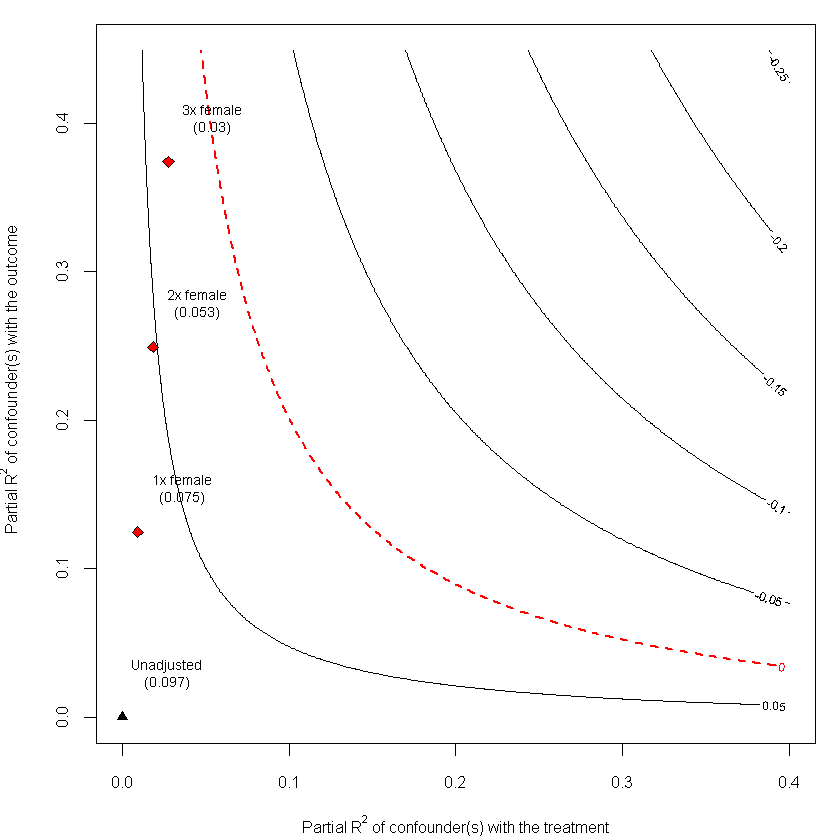

In [13]:
plot(sensitivity)

The estimate $\hat{\tau}_{\text{res}}$ is plotted as a triangular point at the coordinate $(0,0)$.  The two axes correspond to the two hypothetical $R^2$ values given in $\eqref{relativebias}$.  For any combination of partial $R^2$ values along the red, dashed contour line, the omitted variable bias is sufficient to imply that the "true" estimate from running the model specified in $\eqref{ovb1}$ of $\hat{\tau}$ would be zero.  The red diamonds specify effects equal to $1,$ $2,$ or $3$ times the magnitude of the variable "female" (one of the covariates in $W$).  The authors argue that whether an individual is female is strongly predictive of experiencing violence and of having a preference for peace.  Thus, the fact that omitted variables would need to be more than three times as important (in a partial $R^2$ sense) as the "female" variable is indicative that omitted variable bias is unlikely to explain away the results (i.e., set the relative bias to $1$, which implies that $\hat{\tau}$ would be $0$ if estimable).

**A Capital Structure Example**

Let's start with the conclusion of Modigliani and Miller:
\begin{equation}
  V^L = V^U + \tau D. \label{MM}
\end{equation}

Suppose that there is a function $f:A\mapsto V^U$ which maps the asset value of a firm, $A$, to the firm's unlevered value.
For simplicity, we'll take $f()$ to be a polynomial function $f(A)=\sum_{l=1}^L \beta_l A^l$ of order $L$.
Per the theory of Modigliani and Miller, we would thus expect that in the regression
\begin{equation}
  V^L = \sum_{l=1}^L \beta_l A^l + \gamma \tau D + U \label{MMreg}
\end{equation}

the coefficient $\hat{\gamma}$ will be one.

Step 1: fire up WRDS

In [14]:
import wrds
conn = wrds.Connection(wrds_username='nordlund')

Loading library list...
Done


Step 2: pull the requisite data

In [15]:
funda = conn.raw_sql('''
    select distinct
        a.gvkey, a.fyear, a.naicsh,
        a.csho*a.prcc_f + a.dltt + a.dlc as value_levered, 
        a.at-a.gdwl-a.intan as assets, 
        (a.dltt + a.dlc)*b.bcg_mtrint as tauD
    from comp.funda as a
    inner join compa.marginal_tax as b
    on a.gvkey = b.gvkey and a.fyear = b.year
        and a.indfmt = 'INDL'
        and a.datafmt = 'STD'
        and a.popsrc = 'D'
        and a.consol = 'C'
        and a.fyear >= 2000
        and a.at > 0
        and a.dltt+a.dlc < a.at
''')
funda = funda[(funda['assets'] > 0) & (funda['value_levered'] >= funda['assets'])].copy()
funda[['value_levered','assets']].describe()

,value_levered,assets
count,4.575700e+04,4.575700e+04
mean,4.928903e+03,2.037475e+03
std,2.714116e+04,1.622491e+04
min,7.245600e-03,1.000000e-03
25%,6.783682e+01,2.223700e+01
50%,4.070055e+02,1.432660e+02
75%,1.925432e+03,6.975930e+02
max,1.823719e+06,1.020934e+06


Step 3: pass it to Stata

In [16]:
%get funda --from Python3

tostring naicsh, replace
gen sector = substr(naicsh,1,3)
destring sector, replace
drop if sector < 100 | sector > 999
drop naicsh

su *


naicsh was double now str6


sector: all characters numeric; replaced as int
(97 missing values generated)

(113 observations deleted)



    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
       index |     45,644    39768.64    22074.86          1      77136
       gvkey |          0
       fyear |     45,644    2007.388    4.746293       2000       2016
value_leve~d |     45,644    4925.796    27161.97   .0072456    1823719
      assets |     45,644    2036.945    16242.77       .001    1020934
-------------+---------------------------------------------------------
        taud |     45,644    322.4741    3819.172          0   303969.9
      sector |     45,644    412.4792    133.7177        111        999


Step 4: polynomial regression - it's reasonable to suppose that $\vec{\beta}$ would differ for different industries/sectors.

In [17]:
qui reg value_levered i.sector#c.assets i.sector#c.assets#c.assets taud
local r2_observed = e(r2)
local tau = _b[taud]

di "gamma is estimated to be `=round(`tau',.001)', and the model's R-squared is `=round(`r2_observed',.001)'"
test _b[taud] == 1





gamma is estimated to be 3.765, and the model's R-squared is .8320000000000001


 ( 1)  taud = 1

       F(  1, 45456) = 1902.15
            Prob > F =    0.0000


Note that $\hat{\gamma}$ is statistically significantly different from $1$.

Step 5: calculate Oster's $\delta$

In [18]:
qui psacalc delta taud, beta(1)
local delta = r(delta)

qui reg value_levered i.sector#c.assets i.sector#c.assets#c.assets, vce(robust)
local r2_o = e(r2)

di "Oster's delta is `=round(`delta',.01)'"
di "The omitted variables must explain `=round(`r2_o'*`delta',.001)' percent of the variation in y, relative to the other observables which explain `=round(`r2_o',.001)'"






Oster's delta is .12

The omitted variables must explain .097 percent of the variation in y, relative 
> to the other observables which explain .8190000000000001


### Collider Bias (aka Bad Controls)

Believe it or not, adding data to your model is not always good.  In the following graph, there is no backdoor path from $D$ to $Y$ if we exclude $E$ because the unobserved path $D \rightarrow E \leftarrow Z \rightarrow Y$ will "break" at the collider, $E$.  However, if we include $E$ as a variable in the model, the path $D \rightarrow E \leftarrow Z \rightarrow Y$ is opened because the collider is controlled for.  The path is still a backdoor because $Z$ is unobserved.  Hence, including $E$ in the regression will *add* bias to the estimate of the effect of $D$.

In this context $E$ is a "bad" control with respect to $D$.  This is in spite of the fact that $E$ has a causal effect on $Y$.  For this reason, "collider bias" is perhaps a less confusing than "bad control".

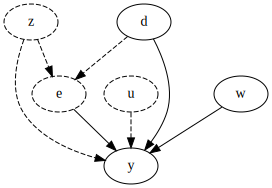

In [19]:
cbias = graphviz.Digraph('G')
cbias.node('e', _attributes={'style': 'dashed'})
cbias.node('z', _attributes={'style': 'dashed'})
cbias.node('u', _attributes={'style': 'dashed'})
cbias.edge('d', 'y')
cbias.edge('w', 'y')
cbias.edge('u', 'y', _attributes={'style': 'dashed'})
cbias.edge('z', 'e', _attributes={'style': 'dashed'})
cbias.edge('d', 'e', _attributes={'style': 'dashed'})
cbias.edge('z', 'y', _attributes={'style': 'dashed'})
cbias.edge('e', 'y')
cbias

Consider the following graphs and Stata analysis (both examples borrowed from Scott Cunningham's *Causal Inference: The Mixtape*).

**Pay Discrimination**

Consider the graphical model of discrimination shown below.

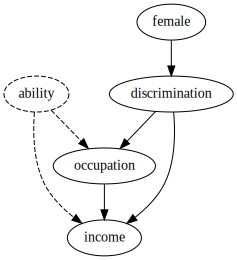

In [20]:
import graphviz
collider = graphviz.Digraph('G')
collider.node('ability', _attributes={'style': 'dashed'})
collider.edge('ability','occupation', _attributes={'style': 'dashed'})
collider.edge('ability','income', _attributes={'style': 'dashed'})
collider.edge('female','discrimination')
collider.edge('discrimination','occupation')
collider.edge('discrimination','income')
collider.edge('occupation','income')
collider

Note that $\text{female}$ is the only node pointing to $\text{discrimination}$.  This implies that we are working under a simplified model in which only females are discriminated against (when, in fact, discrimination along race, sexuality, religion, or other features may occur).  This simplifying assumption means that we can include $\text{female}$ in our regression and fully control for discrimination.  Suppose we have the series of equations:
\begin{equation}
    \text{discrimination} = \text{female} + \epsilon_1 \label{collider1}
\end{equation}
\begin{equation}
    \text{occupation} = \text{ability} - \text{discrimination} + \epsilon_2 \label{collider2}
\end{equation}
\begin{equation}
    \text{income} = \text{ability} + \text{occupation} - \text{discrimination} + \epsilon_3 \label{collider3}
\end{equation}
where $\epsilon_1 \perp (\epsilon_2\text{ }\epsilon_3)$ and $(\epsilon_2\text{ }\epsilon_3)' \sim MVN(\vec{0},I_2 (\sigma_2\text{ }\sigma_3)')$.  The $\beta$ coefficients in all models are one in absolute magnitude.  Plugging $\eqref{collider2}$ in to $\eqref{collider3}$ we have
\begin{equation}
    \text{income} = 2\times\text{ability} - 2\times\text{discrimination} + \epsilon_4 \label{collider4}
\end{equation}
for $\epsilon_4 \sim N(0,\sigma_2 + \sigma_3)$.

The Stata code to generate data according to this model is shown below.

In [21]:
clear *
set obs 10000
set seed 0

gen byte female = runiform() > .5
gen ability = rnormal()
gen byte discrimination = female + (female == 0)*(runiform() > .99) - (runiform() > .99)
gen occupation = ability - discrimination + rnormal()
gen income = ability + occupation - discrimination + rnormal()



Number of observations (_N) was 0, now 10,000.








Because $\text{ability}$ and $\text{female}$ are independent, the total effect of discrimination is given by regressing $\text{income}$ on $\text{female}$.  Given $\eqref{collider4}$, we would expect a $\beta$ coefficient of -2 on $\text{female}$.

In [22]:
reg income female


      Source |       SS           df       MS      Number of obs   =    10,000
-------------+----------------------------------   F(1, 9998)      =   1503.12
       Model |  9214.27486         1  9214.27486   Prob > F        =    0.0000
    Residual |  61288.8213     9,998  6.13010815   R-squared       =    0.1307
-------------+----------------------------------   Adj R-squared   =    0.1306
       Total |  70503.0962     9,999  7.05101472   Root MSE        =    2.4759

------------------------------------------------------------------------------
      income | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      female |   -1.91983   .0495184   -38.77   0.000    -2.016896   -1.822764
       _cons |   .0137958   .0349587     0.39   0.693    -.0547303    .0823219
------------------------------------------------------------------------------


However, if we control for $\text{occupation}$, there is now a backdoor path $\text{discrimination} \rightarrow \text{occupation} \leftarrow \text{ability} \rightarrow \text{income}$.  Remember, backdoor paths are acceptable if there is a collider (e.g. $\rightarrow \text{occupation} \leftarrow$) that is not controlled for.  However, once we add the collider to the model, the path is open and we lose the ability to derive a causal estimate of $\text{discrimination}$ on $\text{income}$ because $\{\text{income}\}$ does not $d$-separate $\text{female}$ from $\text{income}$ (we would need the set $\{\text{ability, occupation}\}$ to achieve $d$-separation).

In [23]:
reg income female occupation


      Source |       SS           df       MS      Number of obs   =    10,000
-------------+----------------------------------   F(2, 9997)      =  17649.43
       Model |  54942.7483         2  27471.3742   Prob > F        =    0.0000
    Residual |  15560.3478     9,997  1.55650173   R-squared       =    0.7793
-------------+----------------------------------   Adj R-squared   =    0.7793
       Total |  70503.0962     9,999  7.05101472   Root MSE        =    1.2476

------------------------------------------------------------------------------
      income | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      female |  -.4786197   .0263307   -18.18   0.000    -.5302332   -.4270062
  occupation |   1.513416   .0088296   171.40   0.000     1.496108    1.530723
       _cons |   .0008055   .0176157     0.05   0.964    -.0337249    .0353358
--------------------------------------------------

If $\text{ability}$ were in fact observable, then we could identify the direct effect of $\text{discrimination}$ as $-1$.

In [24]:
reg income female occupation ability


      Source |       SS           df       MS      Number of obs   =    10,000
-------------+----------------------------------   F(3, 9996)      =  19267.67
       Model |  60108.4159         3  20036.1386   Prob > F        =    0.0000
    Residual |  10394.6803     9,996  1.03988398   R-squared       =    0.8526
-------------+----------------------------------   Adj R-squared   =    0.8525
       Total |  70503.0962     9,999  7.05101472   Root MSE        =    1.0197

------------------------------------------------------------------------------
      income | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      female |   -.970721   .0226261   -42.90   0.000    -1.015073   -.9263693
  occupation |   1.013039   .0101236   100.07   0.000     .9931952    1.032884
     ability |   1.011533   .0143519    70.48   0.000     .9834006    1.039666
       _cons |  -.0072966    .014399    -0.51   0.